<a href="https://colab.research.google.com/github/RaianaSeixas/NLT/blob/main/Relevant_Job__Title_Pictures_v14_NLP_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Determining Relevant Job Title Pictures**
The objective of this short project is to automatically find relevant pictures for job titles. We are looking for pictures that represent the activities typically associated with that job title, showing people or tools used on the job.
## Dataset
The dataset provided is a .csv file with a set of pictures queried from Google Images, with the following available metadata and pre-extracted features:

* Job Title: the job we are trying to get pictures for.

* Pic Title: the picture title according to Google Images.

* Num Resumes: the number of resumes we have available for the job title. This indicates how popular /common the job title is.

* Google Position: the position of the image in the search results.

* Strict Face Count: face count according to a high-precision face recognition algorithm from OpenCV. When it detects a face, it is a human face almost 100% of the time, but it doesn't detect all human faces.

* Relaxed Face Count: face count according to a high-recall face recognition algorithm from OpenCV. It detects human faces almost 100% of the time, but it also confuses some other shapes and objects with human faces.

* KB size: size of the image in kilobytes.

* Height: pixel height of the image.

* Width: pixel width of the image.

* Resolution: total pixels in the image.

* Text regions: number of text regions identified in the image, also using OpenCV.

* Picture URL: the URL of the image.

* Manual Label: a label indicating if the picture is good (relevant) or bad (irrelevant). 

##Methodology
The feature "Manual Label" is available only for  around 20% of the dataset. For this reason, I decided to use unsupervised learning to create the model and use the labaled data to evaluate the quality of the model.
----------
Author: Raiana Roland Seixas
09/07/2022

# Data load & Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.cluster import KMeans

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import Birch

In [ ]:
!git clone https://github.com/RaianaSeixas/NLT
%cd NLT

Cloning into 'NLT'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 42 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/NLT/NLT/NLT


In [ ]:
df=pd.read_csv('occupation_pictures.csv')
#df

In [ ]:
#documents = list(df['Pic Title'].values)
#job = list(df['Job Title'].values)

In [ ]:
#documents

In [ ]:
# this function is to show how tfidf vectorizer works...it is not used in solution
def text_show(corpus):
  def lista_organiza(arr_conv):
    n = arr_conv.shape[0]
    lista =[]
    for i in range(n):
      arr = arr_conv[i]
      ans =' '.join(arr)
      lista.append(ans)
    resp = lista
    return resp  

  corpus = lista_organiza(corpus)

  vectorizer = TfidfVectorizer(stop_words='english')
  XW = vectorizer.fit_transform(corpus)
  return XW

In [ ]:
def text_variable(corpus,documents,cluster_k):
  def lista_organiza(arr_conv):
    n = arr_conv.shape[0]
    lista =[]
    for i in range(n):
      arr = arr_conv[i]
      ans =' '.join(arr)
      lista.append(ans)
    resp = lista
    return resp  

  corpus = lista_organiza(corpus)
  documents = lista_organiza(documents)

  vectorizer = TfidfVectorizer(stop_words='english')
  XW = vectorizer.fit_transform(corpus)

  model = KMeans(n_clusters=cluster_k, init='k-means++', max_iter=100, n_init=1)
  model.fit(XW)
  resp = []
  for x in documents:
    doc=[]
    doc.append(x)
    Y = vectorizer.transform(doc)
    prediction = model.predict(Y)
    resp.append(prediction[0])
  return resp

In [ ]:
def text_kmeans_check(corpus,documents,jobs,cluster_k):
  def lista_organiza(arr_conv):
    n = arr_conv.shape[0]
    lista =[]
    for i in range(n):
      arr = arr_conv[i]
      ans =' '.join(arr)
      lista.append(ans)
    resp = lista
    return resp  

  corpus = lista_organiza(corpus)
  documents = lista_organiza(documents)
  jobs = lista_organiza(jobs)

  vectorizer = TfidfVectorizer(stop_words='english')
  XW = vectorizer.fit_transform(corpus)

  model = KMeans(n_clusters=cluster_k, init='k-means++', max_iter=100, n_init=1)
  model.fit(XW)
  resp = []
  for x in documents:
    doc=[]
    doc.append(x)
    Y = vectorizer.transform(doc)
    prediction = model.predict(Y)
    resp.append(prediction[0])
  y1 = resp
  resp = []
  for x in jobs:
    doc=[]
    doc.append(x)
    Y = vectorizer.transform(doc)
    prediction = model.predict(Y)
    resp.append(prediction[0])
  y2 = resp
  return y1,y2

In [ ]:
def text_variable_Birch(corpus, documents,cluster_k):
  def lista_organiza(arr_conv):
    n = arr_conv.shape[0]
    lista =[]
    for i in range(n):
      arr = arr_conv[i]
      ans =' '.join(arr)
      lista.append(ans)
    resp = lista
    return resp  
  corpus = lista_organiza(corpus)
  documents = lista_organiza(documents)
  vectorizer = TfidfVectorizer(stop_words='english')

  XW = vectorizer.fit_transform(corpus)

  model = Birch(threshold=0.01, n_clusters = cluster_k)
  model.fit(XW)
  resp = []
  for x in documents:
    doc=[]
    doc.append(x)
    Y = vectorizer.transform(doc)
    prediction = model.predict(Y)
    resp.append(prediction[0])
  return resp

In [ ]:
def text_Birch_check(corpus, documents,jobs,cluster_k):
  def lista_organiza(arr_conv):
    n = arr_conv.shape[0]
    lista =[]
    for i in range(n):
      arr = arr_conv[i]
      ans =' '.join(arr)
      lista.append(ans)
    resp = lista
    return resp  
  corpus = lista_organiza(corpus)
  documents = lista_organiza(documents)
  jobs = lista_organiza(jobs)
  vectorizer = TfidfVectorizer(stop_words='english')

  XW = vectorizer.fit_transform(corpus)

  model = Birch(threshold=0.01, n_clusters = cluster_k)
  model.fit(XW)
  resp = []
  for x in documents:
    doc=[]
    doc.append(x)
    Y = vectorizer.transform(doc)
    prediction = model.predict(Y)
    resp.append(prediction[0])
  y1 = resp
  resp = []
  for x in jobs:
    doc=[]
    doc.append(x)
    Y = vectorizer.transform(doc)
    prediction = model.predict(Y)
    resp.append(prediction[0])
  y2 = resp
  return y1,y2

In [ ]:
data=df.drop(columns=['Picture URL'])

In [ ]:
#data['Manual Label'].describe()

In [ ]:
data['Pic Title'].describe()

count                            658
unique                           593
top       Bureau of Labor Statistics
freq                              17
Name: Pic Title, dtype: object

# Exploratory Analysis

# Data Preprocessing

In [ ]:
import nltk
ps = nltk.PorterStemmer()
wn=nltk.WordNetLemmatizer()
nltk.download("popular")
stopwords = nltk.corpus.stopwords.words('english')
import re
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

### Clean up text

In [ ]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['Job Title'] = data['Job Title'].apply(lambda x: clean_text(x.lower()))
data['Pic Title'] = data['Pic Title'].apply(lambda x: clean_text(x.lower()))
#data.head()

In [ ]:
#data.columns

In [ ]:
#documents_new = data['Pic Title'].values
#documents_new

### Stem / Lemmatize text

In [ ]:
def stemming(text):
  stemmed=[ps.stem(word) for word in text]
  return stemmed

data['Stem Job Title'] = data['Job Title'].apply(lambda x: stemming(x))
data['Stem Pic Title'] = data['Pic Title'].apply(lambda x: stemming(x))
#data

In [ ]:
#data[data['Manual Label']=='bad']

In [ ]:
#data[data['Manual Label']=='good']

In [ ]:
#documents = list(data['Stem Pic Title'].values)
#job = list(data['Stem Job Title'].values)

In [ ]:
documents = data['Stem Pic Title'].values
job = data['Stem Job Title'].values

In [ ]:
# print(text_show(documents))

In [ ]:
# documents

In [ ]:
corpus = job + documents

In [ ]:
# data.head()

career, senior

###Data split

In [ ]:
data=data.drop(columns=['Job Title','Pic Title'])

In [ ]:
''' Data (with labels) to test the model '''

labaled= data[data['Manual Label'].notna()]
#labaled.head()

In [ ]:
#Drop target feature
#X = data.drop(columns=['Manual Label','Stem Job Title','Stem Pic Title','KB size','Num Resumes','Google Position','Width','Text Regions']) 
X = data.drop(columns=['Manual Label','Stem Job Title','Stem Pic Title','KB size','Resolution','Width']) 
#'Height','Num Resumes','Google Position','Text Regions'
#X = data.drop(columns=['Manual Label','Stem Job Title','Stem Pic Title']) 
#X['Common']=lista
#X['Division']=divide
#X['Career'] = career
ncluster = [6,8]
cluster_k = 10

y1, y2  = text_kmeans_check(corpus, documents, job, cluster_k)

resp = text_variable(corpus,documents,ncluster[0])
X['Doc_title'] = resp

resp = text_variable(corpus,job,ncluster[1]) 
X['Doc_job'] = resp

X['y1'] = y1
X['y2'] = y2

W = X
scaler = preprocessing.StandardScaler()
Xs = scaler.fit_transform(X)

In [ ]:
#documents

# Predictive Model

In [ ]:
#y_pred = KMeans(n_clusters=2).fit_predict(X)
y_pred = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=1).fit_predict(Xs)

In [ ]:
# len(y_pred)

In [ ]:
# get the elements containing label (we will use it to evaluate the method)
y = data['Manual Label'].replace({'good':0, 'bad':1})
index_no = data['Manual Label'].notna()
y_real = y[index_no].astype(int)
X_eval= Xs[index_no,:]
y_mod = y_pred[index_no]

In [ ]:
#y_real.shape, y_mod.shape



               precision    recall  f1-score   support

      0-Good       0.25      0.02      0.04        91
       1-Bad       0.29      0.86      0.43        42

    accuracy                           0.29       133
   macro avg       0.27      0.44      0.24       133
weighted avg       0.26      0.29      0.16       133



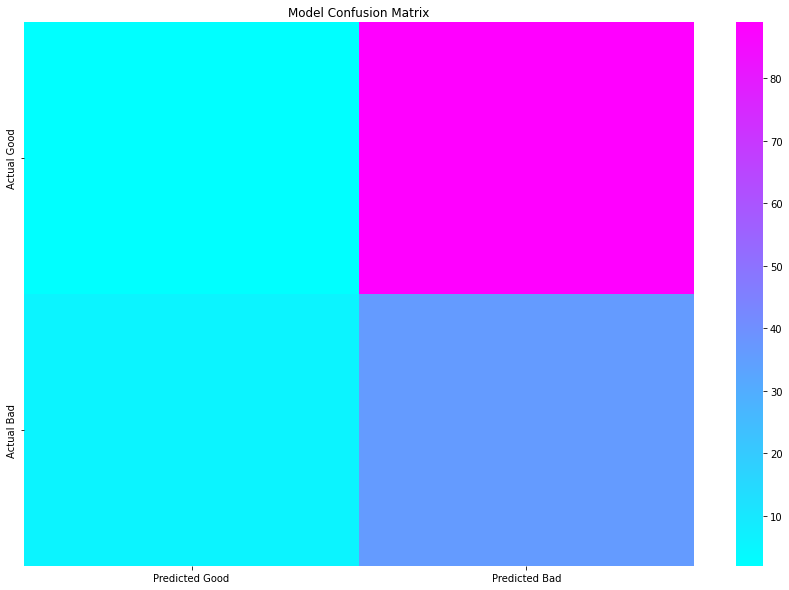

In [ ]:
# Classification Report
print('\n\n', classification_report(y_real, y_mod, target_names=['0-Good', '1-Bad']))
# Confusion Matrix
con_matrix = pd.DataFrame(confusion_matrix(y_real, y_mod), columns=['Predicted Good', 'Predicted Bad'], index=['Actual Good', 'Actual Bad'])
  
plt.figure(figsize=(15,10))
sns.heatmap(data=con_matrix, cmap='cool');
plt.title('Model Confusion Matrix')
plt.show();

In [ ]:
# Birch:  Balanced Iterative Reducing and Clustering using Hierarchies
# “threshold” and “n_clusters” are the hyperparameters

In [ ]:
X = W
X = X.drop(columns= ['Doc_title','Doc_job','y1','y2'])

ncluster = [8,5]
cluster_k = 10

# resp = text_variable(documents,ncluster[0])
y1, y2  = text_Birch_check(corpus, documents, job, cluster_k)

resp = text_variable_Birch(corpus,documents,ncluster[0])
X['Doc_title'] = resp

#resp = text_variable(job,ncluster[1])
resp = text_variable_Birch(corpus,job,ncluster[1])
#X['Doc_job'] = resp

X['y1'] = y1
X['y2'] = y2

W = X
scaler = preprocessing.StandardScaler()
Xs = scaler.fit_transform(X)
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(Xs)
# assign a cluster to each example
y_calc = model.predict(Xs)
index_no = data['Manual Label'].notna()
y_mod = y_calc[index_no]



               precision    recall  f1-score   support

      0-Good       0.78      0.87      0.82        91
       1-Bad       0.62      0.48      0.54        42

    accuracy                           0.74       133
   macro avg       0.70      0.67      0.68       133
weighted avg       0.73      0.74      0.73       133



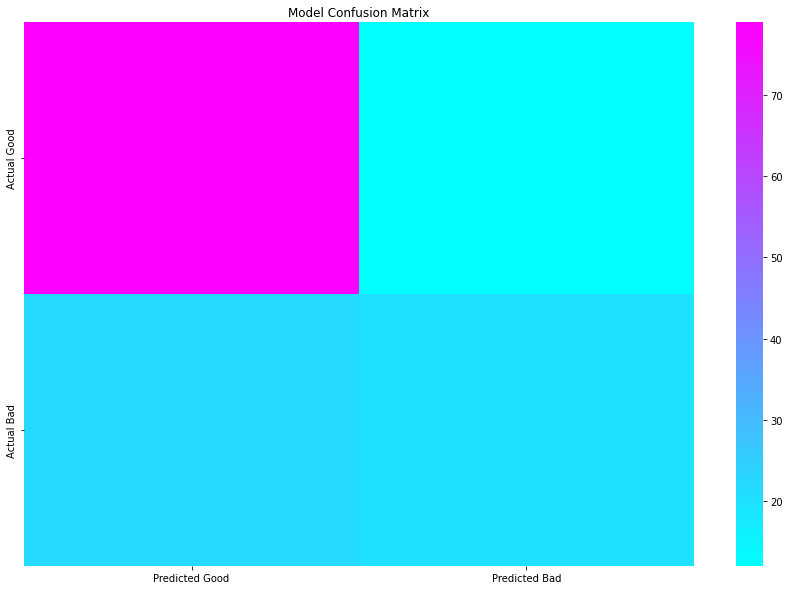

In [ ]:

# Classification Report
print('\n\n', classification_report(y_real, y_mod, target_names=['0-Good', '1-Bad']))
# Confusion Matrix
con_matrix = pd.DataFrame(confusion_matrix(y_real, y_mod), columns=['Predicted Good', 'Predicted Bad'], index=['Actual Good', 'Actual Bad'])
  
plt.figure(figsize=(15,10))
sns.heatmap(data=con_matrix, cmap='cool');
plt.title('Model Confusion Matrix')
plt.show();

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
prec = precision_score(y_real, y_mod)
rec = recall_score(y_real, y_mod)
f1 = f1_score(y_real, y_mod)
acc = accuracy_score(y_real, y_mod)
print('precision=',prec)
print('recall=',rec)
print('f1-score=',f1)
print('accuracy=',acc)

precision= 0.625
recall= 0.47619047619047616
f1-score= 0.5405405405405405
accuracy= 0.7443609022556391


In [ ]:
# W

In [ ]:
#y = data['Manual Label'].replace({'good':0, 'bad':1})
lista = []
for yi in y_calc:
  if(yi == 0):
    lista.append('good')
  else:
    lista.append('bad')

In [ ]:
df['Predict Label'] = lista

In [ ]:
'''
Arq = "output_excel.xlsx"
df.to_excel(Arq)
from google.colab import files
files.download(Arq)
'''

'\nArq = "output_excel.xlsx"\ndf.to_excel(Arq)\nfrom google.colab import files\nfiles.download(Arq)\n'

In [ ]:
'''
Arq = "output_csv.csv"
df.to_csv(Arq)
from google.colab import files
files.download(Arq)
'''

'\nArq = "output_csv.csv"\ndf.to_csv(Arq)\nfrom google.colab import files\nfiles.download(Arq)\n'

In [ ]:
W

,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,Height,Text Regions,Doc_title,y1,y2
0,1261,0,0,7,1917,2,0,0,0
1,1261,1,0,3,340,5,0,0,0
2,1261,2,0,2,380,8,0,0,0
3,1261,3,0,2,330,1,0,0,0
4,1261,4,0,1,1075,3,0,0,0
...,...,...,...,...,...,...,...,...,...
653,61,4,0,0,720,0,1,1,1
654,61,5,0,0,200,0,1,1,1
655,61,6,0,1,500,1,1,1,1
656,61,7,0,1,920,0,1,1,1
